## This project is trying to find the divorce prediction based on the below features ,

Attribute Information:

1. If one of us apologizes when our discussion deteriorates, the discussion ends.
2. I know we can ignore our differences, even if things get hard sometimes.
3. When we need it, we can take our discussions with my spouse from the beginning and correct it.
4. When I discuss with my spouse, to contact him will eventually work.
5. The time I spent with my wife is special for us.
6. We don't have time at home as partners.
7. We are like two strangers who share the same environment at home rather than family.
8. I enjoy our holidays with my wife.
9. I enjoy traveling with my wife.
10. Most of our goals are common to my spouse.
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12. My spouse and I have similar values in terms of personal freedom.
13. My spouse and I have similar sense of entertainment.
14. Most of our goals for people (children, friends, etc.) are the same.
15. Our dreams with my spouse are similar and harmonious.
16. We're compatible with my spouse about what love should be.
17. We share the same views about being happy in our life with my spouse
18. My spouse and I have similar ideas about how marriage should be
19. My spouse and I have similar ideas about how roles should be in marriage
20. My spouse and I have similar values in trust.
21. I know exactly what my wife likes.
22. I know how my spouse wants to be taken care of when she/he sick.
23. I know my spouse's favorite food.
24. I can tell you what kind of stress my spouse is facing in her/his life.
25. I have knowledge of my spouse's inner world.
26. I know my spouse's basic anxieties.
27. I know what my spouse's current sources of stress are.
28. I know my spouse's hopes and wishes.
29. I know my spouse very well.
30. I know my spouse's friends and their social relationships.
31. I feel aggressive when I argue with my spouse.
32. When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
33. I can use negative statements about my spouse's personality during our discussions.
34. I can use offensive expressions during our discussions.
35. I can insult my spouse during our discussions.
36. I can be humiliating when we discussions.
37. My discussion with my spouse is not calm.
38. I hate my spouse's way of open a subject.
39. Our discussions often occur suddenly.
40. We're just starting a discussion before I know what's going on.
41. When I talk to my spouse about something, my calm suddenly breaks.
42. When I argue with my spouse, ı only go out and I don't say a word.
43. I mostly stay silent to calm the environment a little bit.
44. Sometimes I think it's good for me to leave home for a while.
45. I'd rather stay silent than discuss with my spouse.
46. Even if I'm right in the discussion, I stay silent to hurt my spouse.
47. When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48. I feel right in our discussions.
49. I have nothing to do with what I've been accused of.
50. I'm not actually the one who's guilty about what I'm accused of.
51. I'm not the one who's wrong about problems at home.
52. I wouldn't hesitate to tell my spouse about her/his inadequacy.
53. When I discuss, I remind my spouse of her/his inadequacy.
54. I'm not afraid to tell my spouse about her/his incompetence.

Target feature has binary results so Logestic regression would be the best choice for the binary classificatin problem.

### Comparing Decision tree , perceptron and Support vector classifier with the same dataset to understand the performance between each other.

In [1]:
# Importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [2]:
df = pd.read_csv('divorce.csv',delimiter = ';')
print(df.shape)
df.head()

(170, 55)


,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [3]:
df['Class'].value_counts()

0    86
1    84
Name: Class, dtype: int64

In [4]:
df.columns

Index(['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8', 'Atr9',
       'Atr10', 'Atr11', 'Atr12', 'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17',
       'Atr18', 'Atr19', 'Atr20', 'Atr21', 'Atr22', 'Atr23', 'Atr24', 'Atr25',
       'Atr26', 'Atr27', 'Atr28', 'Atr29', 'Atr30', 'Atr31', 'Atr32', 'Atr33',
       'Atr34', 'Atr35', 'Atr36', 'Atr37', 'Atr38', 'Atr39', 'Atr40', 'Atr41',
       'Atr42', 'Atr43', 'Atr44', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49',
       'Atr50', 'Atr51', 'Atr52', 'Atr53', 'Atr54', 'Class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Atr1    170 non-null    int64
 1   Atr2    170 non-null    int64
 2   Atr3    170 non-null    int64
 3   Atr4    170 non-null    int64
 4   Atr5    170 non-null    int64
 5   Atr6    170 non-null    int64
 6   Atr7    170 non-null    int64
 7   Atr8    170 non-null    int64
 8   Atr9    170 non-null    int64
 9   Atr10   170 non-null    int64
 10  Atr11   170 non-null    int64
 11  Atr12   170 non-null    int64
 12  Atr13   170 non-null    int64
 13  Atr14   170 non-null    int64
 14  Atr15   170 non-null    int64
 15  Atr16   170 non-null    int64
 16  Atr17   170 non-null    int64
 17  Atr18   170 non-null    int64
 18  Atr19   170 non-null    int64
 19  Atr20   170 non-null    int64
 20  Atr21   170 non-null    int64
 21  Atr22   170 non-null    int64
 22  Atr23   170 non-null    int64
 23  Atr24   170 non

In [6]:
df.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [7]:
df.isnull().sum()

Atr1     0
Atr2     0
Atr3     0
Atr4     0
Atr5     0
Atr6     0
Atr7     0
Atr8     0
Atr9     0
Atr10    0
Atr11    0
Atr12    0
Atr13    0
Atr14    0
Atr15    0
Atr16    0
Atr17    0
Atr18    0
Atr19    0
Atr20    0
Atr21    0
Atr22    0
Atr23    0
Atr24    0
Atr25    0
Atr26    0
Atr27    0
Atr28    0
Atr29    0
Atr30    0
Atr31    0
Atr32    0
Atr33    0
Atr34    0
Atr35    0
Atr36    0
Atr37    0
Atr38    0
Atr39    0
Atr40    0
Atr41    0
Atr42    0
Atr43    0
Atr44    0
Atr45    0
Atr46    0
Atr47    0
Atr48    0
Atr49    0
Atr50    0
Atr51    0
Atr52    0
Atr53    0
Atr54    0
Class    0
dtype: int64

### All are numerical features and will try to find the relationship between then using correlation so that most posiviely correlated features can be removed

In [8]:
df.corr()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
Atr1,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,...,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
Atr2,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,...,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
Atr3,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,...,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
Atr4,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,...,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
Atr5,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,...,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180
Atr6,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,...,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.420913
Atr7,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,...,0.069850,0.254225,0.311110,0.291325,0.332370,0.349920,0.243104,0.313725,0.347493,0.544835
Atr8,0.802357,0.864284,0.757264,0.798347,0.877584,0.184019,0.412807,1.000000,0.915301,0.828031,...,0.433541,0.675584,0.588531,0.674776,0.729668,0.690190,0.658613,0.705071,0.807911,0.869569
Atr9,0.845916,0.827711,0.816653,0.829053,0.916327,0.301342,0.517522,0.915301,1.000000,0.852385,...,0.434318,0.693839,0.611726,0.711503,0.755509,0.713750,0.652376,0.699211,0.810977,0.912368
Atr10,0.790183,0.782286,0.753017,0.873636,0.823659,0.266076,0.498266,0.828031,0.852385,1.000000,...,0.342315,0.559998,0.550313,0.659604,0.672236,0.618666,0.513842,0.592641,0.698528,0.834897


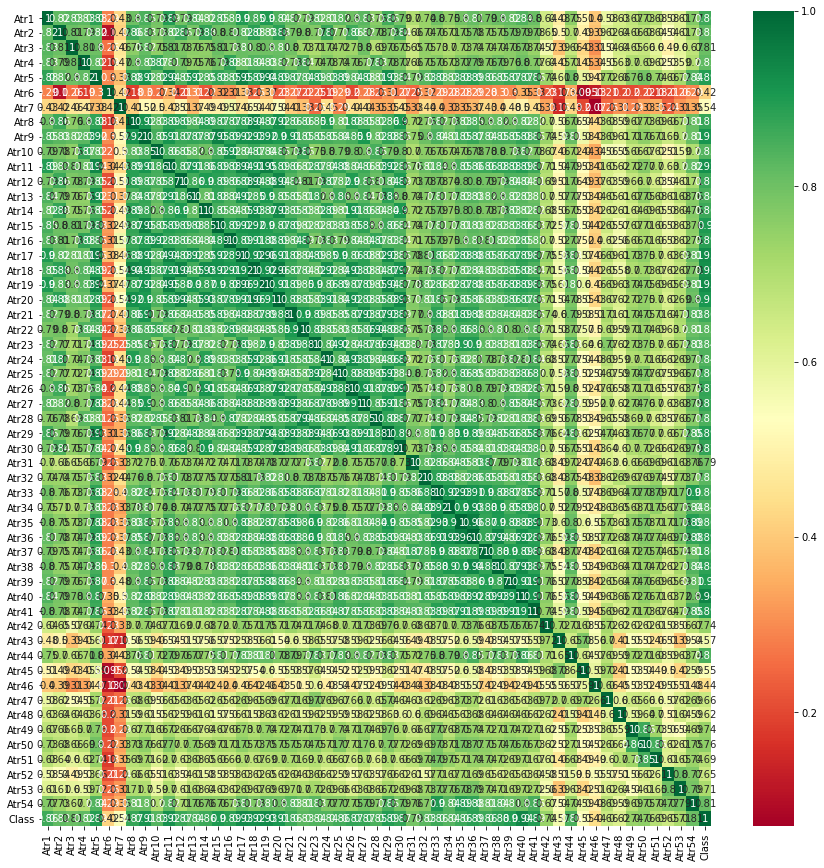

In [9]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')

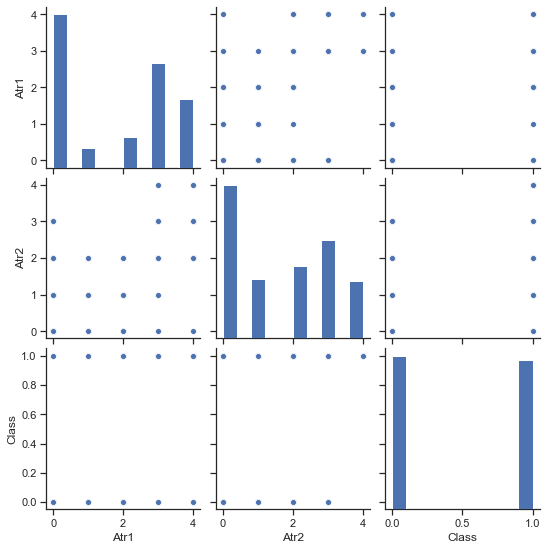

In [10]:
# Plotting the data in to 2D using pair plot to understand the distribution of the data
sns.set(style="ticks", color_codes=True)
# g = sns.pairplot(df)
g = sns.pairplot(df, vars=["Atr1","Atr2","Class"])

In [11]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print( X.shape , y.shape)

(170, 54) (170,)


## Split data in to 70-30 ( train - test )

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=10)

In [13]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(119, 54) (119,) (51, 54) (51,)


# Decision tree

In [14]:
dct = DecisionTreeClassifier(random_state=0,max_depth=4)
%time dct.fit(X_train,y_train)
print("Training Acc: ",accuracy_score(y_train,dct.predict(X_train)))
print("Testing Acc: ",accuracy_score(y_test, dct.predict(X_test)))

Wall time: 2.95 ms
Training Acc:  1.0
Testing Acc:  0.9803921568627451


# Perceptron

In [15]:
percept = Perceptron(random_state=0)
%time percept.fit(X_train,y_train)
print("Training Acc: ",accuracy_score(y_train,dct.predict(X_train)))
print("Testing Acc: ",accuracy_score(y_test, dct.predict(X_test)))

Wall time: 3.27 ms
Training Acc:  1.0
Testing Acc:  0.9803921568627451


# Logistic Regression

In [16]:
%%time
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
print("Training Acc: ",lr.score(X_train,y_train))
print("Testing Acc: ",accuracy_score(y_test, lr.predict(X_test)))

Training Acc:  1.0
Testing Acc:  1.0
Wall time: 44.6 ms


In [17]:
#  Cross val score for logestic regression
scores = cross_val_score(lr, X, y,cv =25)
print(scores)

[0.85714286 0.71428571 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]


In [18]:
#  Cross val score for perceptron
scores = cross_val_score(percept, X, y,cv =25)
print(scores)

[0.85714286 0.57142857 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.83333333 1.
 1.        ]


In [19]:
#  Cross val score for decision tree
scores = cross_val_score(dct, X, y,cv =25)
print(scores)

[0.85714286 0.71428571 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.85714286 0.85714286
 1.         1.         1.         1.         0.83333333 1.
 0.83333333]


In [20]:
# Model Parameters for perceptron

In [21]:
percept.coef_

array([[  4.,  -1.,   1.,   1.,   6.,   2.,   4.,   3.,   7.,  -3.,   5.,
         -4.,  -8.,   3.,   6.,   3.,   4.,   5.,   2.,   6.,   2.,   2.,
         -1.,  -1.,   0.,   6.,   1.,   9.,   6.,   7.,  -3.,  -2.,   2.,
          3.,   2.,   7.,  -2.,   4.,   9.,  15.,   3.,   3., -12.,   6.,
         -8.,  -8.,  -2., -13.,   1.,  -1.,  -8.,   0.,   2.,  -7.]])

In [22]:
percept.intercept_

array([-10.])

In [23]:
percept.t_

1429.0

In [24]:
percept.n_iter_

12

In [25]:
# Model Parameters for logestic regression

In [26]:
lr.coef_

array([[ 0.25815923,  0.26844125,  0.34507093,  0.10832407,  0.17211917,
         0.31721453, -0.0013021 ,  0.09200871,  0.10445304, -0.06760435,
         0.12354531,  0.13152824, -0.079805  ,  0.20668886,  0.29063894,
         0.14001774,  0.36548026,  0.28428066,  0.26407556,  0.29432811,
         0.09621369, -0.00231023, -0.04089089, -0.07805122,  0.16096315,
         0.46918735,  0.11194401,  0.33276291,  0.18895726,  0.22313093,
         0.34301479,  0.18457059,  0.16320893,  0.19911539,  0.08292528,
         0.20465844,  0.00836004,  0.19070603,  0.29603966,  0.56388628,
         0.19975948,  0.14658135,  0.13770495,  0.38030684,  0.01327368,
         0.06092171,  0.07824131, -0.06760666,  0.45069183,  0.17834564,
        -0.00920917,  0.23243241,  0.29359408, -0.06489133]])

In [27]:
lr.intercept_

array([-10.04837086])

## Support vector classification

In [28]:
clf = SVC(kernel="linear")
clf.fit(X_train,y_train)
print("Training Acc: ",clf.score(X_train,y_train))
print("Testing Acc: ",accuracy_score(y_test, clf.predict(X_test)))

Training Acc:  1.0
Testing Acc:  1.0


In [29]:
#  Cross val score for SVC
scores = cross_val_score(clf, X, y,cv =25)
print(scores)

[0.85714286 0.71428571 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]


In [30]:
# Model Parameters for SVC

In [31]:
clf.coef_

array([[ 0.07820928,  0.06653868,  0.10577773,  0.0441716 ,  0.06947609,
         0.08867096,  0.        ,  0.01521097,  0.01521097, -0.07300618,
         0.00597194,  0.01525366, -0.03780423,  0.05991856,  0.10397221,
         0.05656545,  0.13193208,  0.08247752,  0.09710227,  0.09720269,
         0.03294585,  0.        , -0.01263308, -0.00890885,  0.05366095,
         0.16492021,  0.02952246,  0.11886475,  0.06821269,  0.0752421 ,
         0.09409113,  0.09583701,  0.07660656,  0.07581716,  0.04563169,
         0.08535329,  0.01832218,  0.07060324,  0.0623759 ,  0.16992271,
         0.05323735,  0.06264985,  0.061437  ,  0.11035739, -0.01911319,
         0.01128796,  0.04147186, -0.01261467,  0.17584029,  0.06319507,
        -0.00327324,  0.08244536,  0.11491196, -0.03839175]])

In [32]:
clf.support_vectors_

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 3., 4., 1., 2.,
        2., 2., 2., 3., 2., 2.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 2., 2., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 2., 1.,
        0., 0., 0., 0., 1., 1., 2., 1., 0., 2., 2., 2., 1., 0., 1., 3.,
        2., 2., 2., 1., 0., 0.],
       [2., 2., 3., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 2., 2., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 2., 2., 1., 1., 1., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4., 4., 0.,
        4., 0., 0., 0., 0., 0.],
    

In [33]:
clf.dual_coef_

array([[-5.86818632e-05, -2.25882235e-02, -3.39778911e-02,
        -6.31654062e-03, -2.48877537e-02, -1.94062787e-03,
        -2.29067315e-02, -1.89828772e-02, -1.61020000e-02,
        -5.18640468e-03, -5.05313536e-03, -1.94033254e-03,
         6.69237426e-02,  4.56903696e-02,  3.97216018e-02,
         7.60548584e-03]])

In [34]:
clf.intercept_

array([-2.9867725])